# 🐍🔥 ¿Cómo aprende una Red Neuronal?

En este tutorial de código, veremos:
* FeedForward: Operación a Corazón Abierto
* Descenso de Gradiente
* Funciones de Activación
  * Función sigmoide
  * Función softmax
  * Función ReLu

Al finalizar habrás logrado una comprensión de los cálculos que se realizan internarmente entre las capas y sus neuronas, cuando se lleva a cabo el feed forward en una red neuronal completamente conectada (neural network fully connected). Tanto de manera matemática, empleando operaciones de matrices, como
de manera automática, empleando operaciones con nn.Sequential.

Además, habrás aprendido a aplicar diferentes tipos de funciones de activación, como la sigmoide, la softmax, la ReLu.

## Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## Parte I: Feedforward

In [ ]:
input_tensor = torch.Tensor([[2, 3]])
wi1 = torch.Tensor([[1, 1]])
wi2 = torch.Tensor([[-1, 1]])
wi3 = torch.Tensor([[1, -1]])
bias = torch.Tensor([0])

In [ ]:
# Dimensiones vectores y pesos
input_tensor.shape, wi1.shape

(torch.Size([2]), torch.Size([1, 2]))

In [ ]:
# Operación Capa Oculta Neurona 1
n1 = torch.matmul(input_tensor, wi1.T) + bias
n1

tensor([5.])

In [ ]:
# Operación Capa Oculta Neurona 2
n2 = torch.matmul(input_tensor, wi2.T) + bias
n2

tensor([[1.]])

In [ ]:
# Operación Capa Oculta Neurona 3
n3 = torch.matmul(input_tensor, wi3.T) + bias
n3

tensor([[-1.]])

In [ ]:
# Output de la Capa Oculta
hidden_layer_output = torch.hstack((n1, n2, n3))
hidden_layer_output

tensor([[ 5.,  1., -1.]])

In [ ]:
# Output Capa de salida
wi_h_s = torch.Tensor([[2, -1, 1]])
output = torch.matmul(hidden_layer_output, wi_h_s.T) + bias
output

tensor([[8.]])

In [ ]:
# Apalancarse con tensores
X = input_tensor.repeat(1, 1)
W1 = torch.vstack((wi1, wi2, wi3))
X, W1, X.shape, W1.shape

(tensor([[2., 3.]]),
 tensor([[ 1.,  1.],
         [-1.,  1.],
         [ 1., -1.]]),
 torch.Size([1, 2]),
 torch.Size([3, 2]))

In [ ]:
# Output de la Capa Oculta
hidden_layer_output = torch.matmul(X, W1.T)
hidden_layer_output

tensor([[ 5.,  1., -1.]])

In [ ]:
# Operación de la Capa de Salida
torch.matmul(hidden_layer_output, wi_h_s.T)

tensor([[8.]])

## Operación a Corazón Abierto de una Red Neuronal  👩‍⚕️💖🕵️‍♂️

In [ ]:
# Veamos cómo serían las entradas y salidas, pesos y bias de una capa
seed = 28
torch.manual_seed(seed)

input_tensor = torch.Tensor([[4, 5]])
n = 3
# Capa Lineal
linear_layer = nn.Linear(in_features=input_tensor.shape[1], out_features=n)
output_linear_layer = linear_layer(input_tensor)
print(f'Salida de la capa oculta:\n{output_linear_layer}\n')

# Capa oculta a capa de salida
output_layer = nn.Linear(in_features=output_linear_layer.shape[1], out_features=1)
output = output_layer(output_linear_layer)
print(f'Salida de la capa de salida:\n{output}')

Salida de la capa oculta:
tensor([[ 2.7539,  2.8982, -1.1063]], grad_fn=<AddmmBackward0>)

Salida de la capa de salida:
tensor([[0.8347]], grad_fn=<AddmmBackward0>)


### Pesos y Bias

In [ ]:
# CAPA OCULTA: Pesos y bias (aleatorios)
for name, param in linear_layer.named_parameters():
  print(f'{name}: \n\t{param.data}\n\tDimensiones: {param.data.shape}')

weight: 
	tensor([[ 0.1803,  0.3263],
        [ 0.2508,  0.3367],
        [ 0.6952, -0.6402]])
	Dimensiones: torch.Size([3, 2])
bias: 
	tensor([ 0.4011,  0.2113, -0.6860])
	Dimensiones: torch.Size([3])


In [ ]:
# CAPA DE SALIDA: Pesos y bias (aleatorios)
for name, param in output_layer.named_parameters():
  print(f'{name}: \n\t{param.data}\n\tDimensiones: {param.data.shape}')

weight: 
	tensor([[-0.1986,  0.3628, -0.0171]])
	Dimensiones: torch.Size([1, 3])
bias: 
	tensor([0.3112])
	Dimensiones: torch.Size([1])


### Cálculo manual de la red neuronal

In [ ]:
# Detalle del cálculo de la capa oculta --> salida de capa oculta
pesos = linear_layer.weight
sesgos = linear_layer.bias
torch.matmul(input_tensor, pesos.T) + sesgos

tensor([[ 2.7539,  2.8982, -1.1063]], grad_fn=<AddBackward0>)

In [ ]:
# Detalle del cálculo de la capa de salida
pesos = output_layer.weight
sesgos = output_layer.bias
torch.matmul(output_linear_layer, pesos.T) + sesgos

tensor([[0.8347]], grad_fn=<AddBackward0>)

### Cálculo con nn.Sequential

In [ ]:
torch.manual_seed(seed)

n = 3
# Red neuronal con 2 capas (oculta y salida)
model = nn.Sequential(nn.Linear(in_features=input_tensor.shape[1], out_features=n),
                      nn.Linear(n, 1)
                     )

output = model(input_tensor)
print(output)

tensor([[0.8347]], grad_fn=<AddmmBackward0>)


In [ ]:
for name, param in model.named_parameters():
  # if param.requires_grad:
    print(f'{name}: \n\t{param.data}\n\tDimensiones: {param.data.shape}')


0.weight: 
	tensor([[ 0.1803,  0.3263],
        [ 0.2508,  0.3367],
        [ 0.6952, -0.6402]])
	Dimensiones: torch.Size([3, 2])
0.bias: 
	tensor([ 0.4011,  0.2113, -0.6860])
	Dimensiones: torch.Size([3])
1.weight: 
	tensor([[-0.1986,  0.3628, -0.0171]])
	Dimensiones: torch.Size([1, 3])
1.bias: 
	tensor([0.3112])
	Dimensiones: torch.Size([1])


In [ ]:
# Pesos y sesgos de la capa de entrada (capa 0)
l1_weights = model[0].weight
l1_bias = model[0].bias
l1_output = torch.matmul(input_tensor, l1_weights.T) + l1_bias
l1_output

tensor([[ 2.7539,  2.8982, -1.1063]], grad_fn=<AddBackward0>)

In [ ]:
# Función para obtener los pesos y sesgos de una capa
def get_weights_and_bias(layer_number, model):
  weights = model[layer_number].weight
  bias = model[layer_number].bias
  return weights, bias

# Pesos y sesgos de la capa de salida (capa 1)
layer_number = 1
l2_weights, l2_bias = get_weights_and_bias(layer_number, model)

# Salida de la capa 1
l2_output = torch.matmul(l1_output, l2_weights.T) + l2_bias
l2_output

tensor([[0.8347]], grad_fn=<AddBackward0>)

## Red Neuronal con varias muestras

In [ ]:
# Veamos cómo serían las entradas y salidas, pesos y bias, de una capa
torch.manual_seed(seed)

input_tensor = torch.Tensor([[8, 5, 6, 2, 4, 5, 7],
                            [1, 2, 3, 4, 5, 6, 7],
                             [9, 8, 7, 6, 5, 4, 3]])
n = 4
# Capa Lineal
linear_layer = nn.Linear(in_features=input_tensor.shape[1], out_features=n)
output_linear_layer = linear_layer(input_tensor)
print(f'Salida de la capa oculta:\n{output_linear_layer}\n')

# Capa oculta a capa de salida
output_layer = nn.Linear(in_features=output_linear_layer.shape[1], out_features=1)
output = output_layer(output_linear_layer)
print(f'Salida de la capa de salida:\n{output}')

Salida de la capa oculta:
tensor([[ 3.8505,  0.7403, -0.7386,  3.4482],
        [ 2.6398,  2.1073, -0.7635,  1.7878],
        [ 5.1803, -0.3644, -1.5576,  1.4235]], grad_fn=<AddmmBackward0>)

Salida de la capa de salida:
tensor([[-2.8107],
        [-1.6803],
        [-2.3069]], grad_fn=<AddmmBackward0>)


### Cálculo manual

In [ ]:
# Detalle del cálculo de la capa oculta --> salida de capa oculta
pesos = linear_layer.weight
sesgos = linear_layer.bias

salida_capa_oculta = torch.matmul(input_tensor, pesos.T) + sesgos

print(f'- Pesos: \n{pesos}\n')
print(f'- Sesgos: \n{sesgos}\n')
print(f'- Salida de Capa oculta: \n{salida_capa_oculta}')

- Pesos: 
Parameter containing:
tensor([[ 0.0964,  0.1744,  0.1341,  0.1800,  0.3716, -0.3422,  0.2144],
        [ 0.1130, -0.3667, -0.1300,  0.2375, -0.0112,  0.2037,  0.1807],
        [-0.0005, -0.1739,  0.0568, -0.3228,  0.3467, -0.0809, -0.1274],
        [ 0.3532,  0.0178, -0.3653, -0.2941,  0.1710,  0.1864,  0.2185]],
       requires_grad=True)

- Sesgos: 
Parameter containing:
tensor([-0.2332, -0.2633,  0.3489,  0.1688], requires_grad=True)

- Salida de Capa oculta: 
tensor([[ 3.8505,  0.7403, -0.7386,  3.4482],
        [ 2.6398,  2.1073, -0.7635,  1.7878],
        [ 5.1803, -0.3644, -1.5576,  1.4235]], grad_fn=<AddBackward0>)


In [ ]:
# Detalle del cálculo de la capa de salida
pesos = output_layer.weight
sesgos = output_layer.bias

salida_capa_salida = torch.matmul(output_linear_layer, pesos.T) + sesgos

print(f'- Pesos: \n{pesos}\n')
print(f'- Sesgos: \n{sesgos}\n')
print(f'- Salida de Capa oculta: \n{salida_capa_salida}')

- Pesos: 
Parameter containing:
tensor([[-0.2422,  0.0516,  0.0661, -0.4628]], requires_grad=True)

- Sesgos: 
Parameter containing:
tensor([-0.2718], requires_grad=True)

- Salida de Capa oculta: 
tensor([[-2.8107],
        [-1.6803],
        [-2.3069]], grad_fn=<AddBackward0>)


### Cálculo con nn.Sequential


In [ ]:
torch.manual_seed(seed)

# Red neuronal con 2 capas (oculta y salida)
model = nn.Sequential(nn.Linear(in_features=input_tensor.shape[1], out_features=n),
                      nn.Linear(n, 1)
                     )

output = model(input_tensor)
print(output)

tensor([[-2.8107],
        [-1.6803],
        [-2.3069]], grad_fn=<AddmmBackward0>)


## Funciones de Activación

<img src="https://dustinstansbury.github.io/theclevermachine/assets/images/a-gentle-introduction-to-neural-networks/common_activation_functions.png" width=800>

<img src="https://www.researchgate.net/publication/335845675/figure/fig3/AS:804124836765699@1568729709680/Commonly-used-activation-functions-a-Sigmoid-b-Tanh-c-ReLU-and-d-LReLU.ppm" width=800>

https://medium.com/soldai/introducci%C3%B3n-al-deep-learning-i-funciones-de-activaci%C3%B3n-b3eed1411b20

### Función Sigmoide  📈

\begin{align}
σ(x) = \frac{1}{(1 + e^{-x})}
\end{align}

In [ ]:
# Instanciar función sigmoide y aplicar a la salida de la red
sigmoid = nn.Sigmoid()
probability = sigmoid(salida_capa_salida)
print(probability)

tensor([[0.0567],
        [0.1571],
        [0.0906]], grad_fn=<SigmoidBackward0>)


In [ ]:
# La red neuronal con función sigmoide como salida
torch.manual_seed(seed)

model = nn.Sequential(
  nn.Linear(input_tensor.shape[1], 4),
  nn.Linear(4, 1),
  nn.Sigmoid()
)

output = model(input_tensor)
print(output)

tensor([[0.0567],
        [0.1571],
        [0.0906]], grad_fn=<SigmoidBackward0>)


### Función Softmax 📈

\begin{align}
S(z_i) = \frac{e^{z_i}}{Σe^{z_i}}
\end{align}

In [ ]:
# Simulando distintas salidas (clasificación múltiple)
outputs = torch.tensor([[-3.7, -2.5, -0.2,  0.8, 1.8, 3.2]])

# Instanciar función sigmoide y aplicar a distintos valores
softmax = nn.Softmax(dim=-1)
probabilities = softmax(outputs)
print(probabilities)

tensor([[0.0007, 0.0024, 0.0243, 0.0660, 0.1793, 0.7273]])


In [ ]:
# La red neuronal con función sigmoide como salida
model = nn.Sequential(
  nn.Linear(input_tensor.shape[1], 3),
  nn.Softmax(dim=-1)
  )

output = model(input_tensor)
print(output)

tensor([[2.4240e-01, 7.5760e-01, 6.4910e-07],
        [4.6144e-01, 5.3855e-01, 9.9658e-06],
        [3.7214e-01, 6.2786e-01, 7.5278e-08]], grad_fn=<SoftmaxBackward0>)


### Función ReLU 📈

\begin{align}
ReLU(x) = \max(0, x)
\end{align}

Demostración del contraste de resultados aplicando sólo función Lineal a la red VS aplicando la función ReLU a la salida de las capas ocultas.

In [ ]:
# SIMULANDO PESOS EN LA RED NEURONAL
# Calcular la primera y segunda capa oculta
input_layer = input_tensor
# Simular pesos en la capa oculta 1 y 2, con números aleatorios
n = 3
weight_1 = torch.randn(input_layer.shape[1], n)
weight_2 = torch.randn(n, 1)
weight_3 = torch.randn(1, 1)
print(f'- Datos de entrada: \n{input_layer}\n')
print(f'- Pesos capa oculta 1: \n{weight_1}\n')
print(f'- Pesos capa oculta 2: \n{weight_2}\n')
print(f'- Pesos capa de salida: \n{weight_3}\n')
# Calcular la salida de la capa oculta 1 y 2
hidden_1 = torch.matmul(input_layer, weight_1)
hidden_2 = torch.matmul(hidden_1, weight_2)
# Calcular la salida
print(f'Datos de salida: \n{torch.matmul(hidden_2, weight_3)}\n')

# Calcular los pesos compuestos
weight_composed_1 = torch.matmul(weight_1, weight_2)
weight_composed_2 = torch.matmul(weight_composed_1, weight_3)
print(f'- Pesos compuestos: \n{weight_composed_2}\n')
# Calcular la salida con los pesos compuestos resultantes
print(f'Datos de salida: \n{torch.matmul(input_layer, weight_composed_2)}\n')

- Datos de entrada: 
tensor([[8., 5., 6., 2., 4., 5., 7.],
        [1., 2., 3., 4., 5., 6., 7.],
        [9., 8., 7., 6., 5., 4., 3.]])

- Pesos capa oculta 1: 
tensor([[ 1.4160,  0.5211,  0.6240],
        [ 0.3232, -0.2505,  1.8428],
        [-0.3573, -0.6172,  0.0892],
        [-1.8475, -0.1795, -0.5823],
        [-1.0534,  0.4424,  0.9385],
        [-0.9320, -0.0924,  0.1851],
        [ 0.2701, -0.9462,  0.2195]])

- Pesos capa oculta 2: 
tensor([[ 2.4113],
        [-0.0233],
        [ 1.3363]])

- Pesos capa de salida: 
tensor([[0.5019]])

Datos de salida: 
tensor([[ 13.4992],
        [-12.0818],
        [  8.0640]])

- Pesos compuestos: 
tensor([[ 2.1263],
        [ 1.6301],
        [-0.3654],
        [-2.6245],
        [-0.6506],
        [-1.0028],
        [ 0.4852]])

Datos de salida: 
tensor([[ 13.4992],
        [-12.0818],
        [  8.0640]])



In [ ]:
# APLICAR NO LINEALIDAD A LOS RESULTADOS DE LA RED
# Crear instancias de no linealidad - Función ReLU
relu = nn.ReLU()

# Aplicar no linealidad en las capas ocultas
hidden_1_activated = relu(torch.matmul(input_layer, weight_1))
hidden_2_activated = relu(torch.matmul(hidden_1_activated, weight_2))
# Calcular la salida
print(f'Datos de salida: \n{torch.matmul(hidden_2_activated, weight_3)}\n')

# Aplicar no linealidad en el producto de los dos primeros pesos
weight_composed_1_activated = relu(torch.matmul(weight_1, weight_2))
# Multiplicar "weight_composed_1_activated" con "weight_3"
weight = torch.matmul(weight_composed_1_activated, weight_3)
# Calcular la salida
print(f'Datos de salida: \n{torch.matmul(input_layer, weight)}\n')

Datos de salida: 
tensor([[13.4237],
        [ 6.4308],
        [15.8166]])

Datos de salida: 
tensor([[28.5575],
        [ 8.7828],
        [33.6335]])



## PARTE II: Descenso de Gradiente
---

El descenso del gradiente es el método estándar utilizado para minimizar la función de pérdida o error, esto es, reducir la diferencia entre el resultado obtenido y el que se busca obtener. En este algoritmo los pesos sinápticos de la red son modificados hasta que dicha función alcanza un mínimo.

Entrenar una red neuronal implica resolver un problema de optimización. Minimizando la función de pérdida ajustando los hiperparámetros del modelo. Para esto, se suele utilizar un algoritmo llamado descenso de gradiente estocástico (SGD) o sus variantes.

El optimizador toma los parámetros del modelo como entradas, y otros dos argumentos:
1. *Tasa de aprendizaje*: controla el tamaño del paso tomado por el optimizador
2. *Momentum*: controla la inercia del optimizador.

Encontrar buenos valores para la tasa de aprendizaje y el momentum es fundamental, ya que algunas combinaciones de valores pueden provocar tiempos de entrenamiento más prolongados o un mal rendimiento general.

--

**TASA DE APRENDIZAJE O LEARNING RATE**

La tasa de aprendizaje controla el tamaño del paso tomado por el optimizador. Los valores típicos de la tasa de aprendizaje oscilan entre 1e-2 y 1e-4. Si la tasa de aprendizaje es demasiado alta, es posible que el optimizador nunca pueda minimizar la función de pérdida. Si es demasiado bajo, el entrenamiento puede llevar más tiempo.

**MOMENTUM**

Las funciones de pérdida no son convexas. Uno de los desafíos al tratar de encontrar el mínimo de una función no convexa es quedarse atascado en un mínimo local. Cuando usamos un valor de momentum correcto, podemos encontrar el mínimo de la función. Este parámetro proporciona un impulso al optimizador que le permite superar las caídas locales.

El momentum mantiene el tamaño del paso grande cuando los pasos anteriores también son grandes, incluso si el gradiente actual es pequeño.

El valor del momentum generalmente se define en el rango entre 0.0 y 1.0, a menudo, tiene un valor cercano a 1.0; como 0.8, 0.9 o 0.99.

In [ ]:
def function(x):
    return 2*x**4 + 3*x**3 - 5*x**2


def optimize(lr=0.01, momentum=0.0):
  x = torch.tensor(2.0, requires_grad=True)
  buffer = torch.zeros_like(x.data)
  values = []
  for i in range(10):

      y = function(x)
      values.append((x.clone(), y.clone()))
      y.backward()

      d_p = x.grad.data
      if momentum !=0 :
          buffer.mul_(momentum).add_(d_p)
          d_p = buffer

      x.data.add_(d_p, alpha=-lr)
      x.grad.zero_()

  x = np.arange(-3, 2, 0.001)
  y = function(x)

  return x, y, values


def plot(x, y, values, ax):
  ax.plot([v[0].detach().numpy() for v in values], [v[1].detach().numpy() for v in values], 'r-X',
            linewidth=2, markersize=5)
  for i in range(10):
      plt.text(values[i][0]+0.1, values[i][1], f'step {i + 1}', fontdict={'color': 'r'}, fontsize=10)
  ax.plot(x, y, linewidth=2)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_title(f'Learning Rate: {lr} - Momentum: {mom}')
  plt.grid()
  plt.legend(['Pasos del optimizador', 'Función Polinómica'])

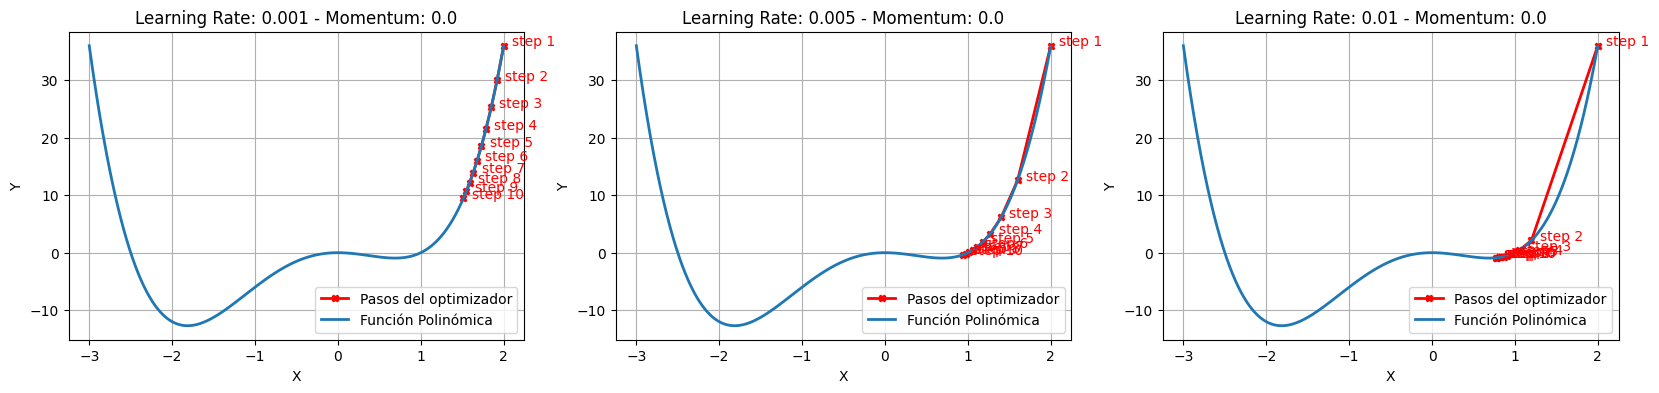

In [ ]:
# Variación de la Tasa de Aprendizaje - Momentum nulo
mom = 0.0
lrs = [0.001, 0.005, 0.01]
n_cols = len(lrs)
n_rows = 1
fig = plt.figure(figsize=(20, 4))

for i, lr in enumerate(lrs):
  ax = fig.add_subplot(n_rows, n_cols, i + 1)

  x, y, values = optimize(lr, mom)
  plot(x, y, values, ax)

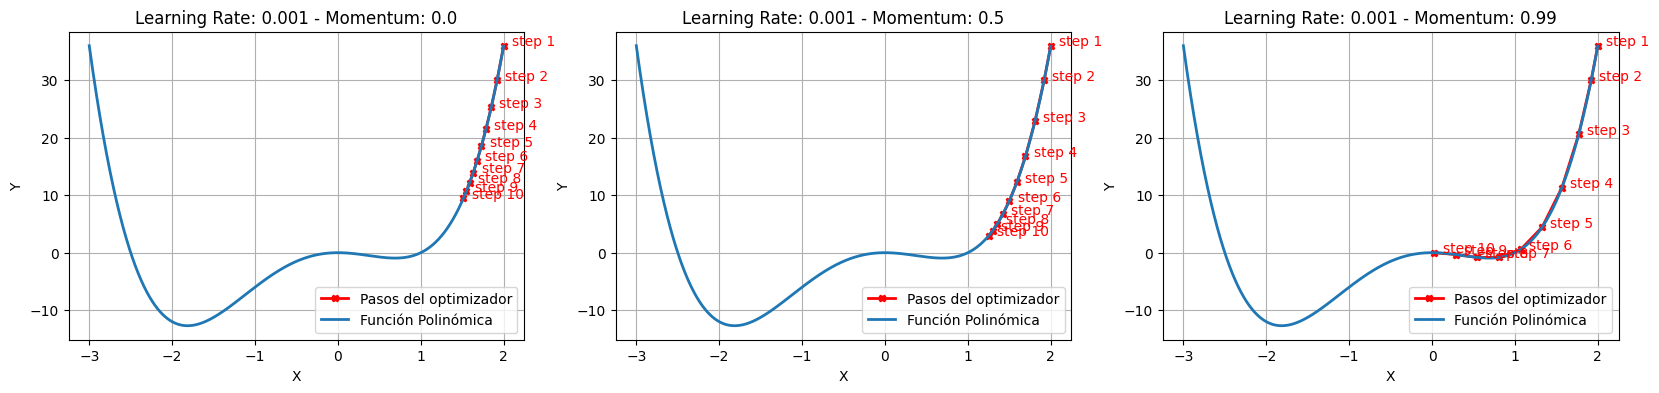

In [ ]:
# Variación del Momentum - Tasa de Aprendizaje constante (valor pequeño)
lr = 0.001
moms = [0.0, 0.5, 0.99]
n_cols = len(moms)
n_rows = 1
fig = plt.figure(figsize=(20, 4))

for i, mom in enumerate(moms):
  ax = fig.add_subplot(n_rows, n_cols, i + 1)

  x, y, values = optimize(lr, mom)
  plot(x, y, values, ax)

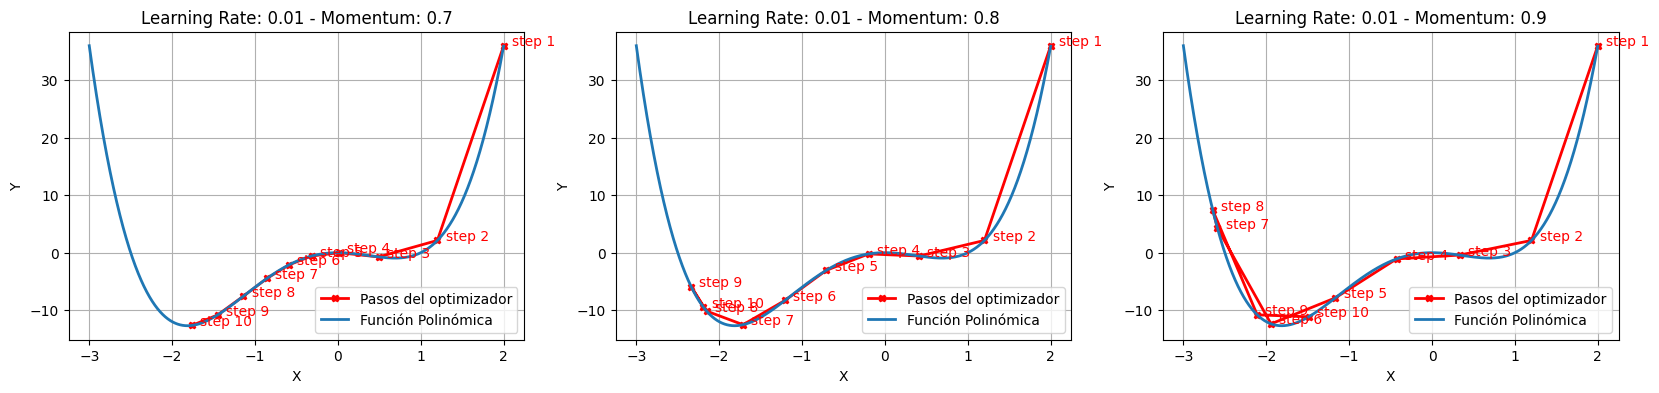

In [ ]:
# Variación del Momentum - Tasa de Aprendizaje alta
lr = 0.01
moms = [0.7, 0.8, 0.9]
n_cols = len(moms)
n_rows = 1
fig = plt.figure(figsize=(20, 4))

for i, mom in enumerate(moms):
  ax = fig.add_subplot(n_rows, n_cols, i + 1)

  x, y, values = optimize(lr, mom)
  plot(x, y, values, ax)

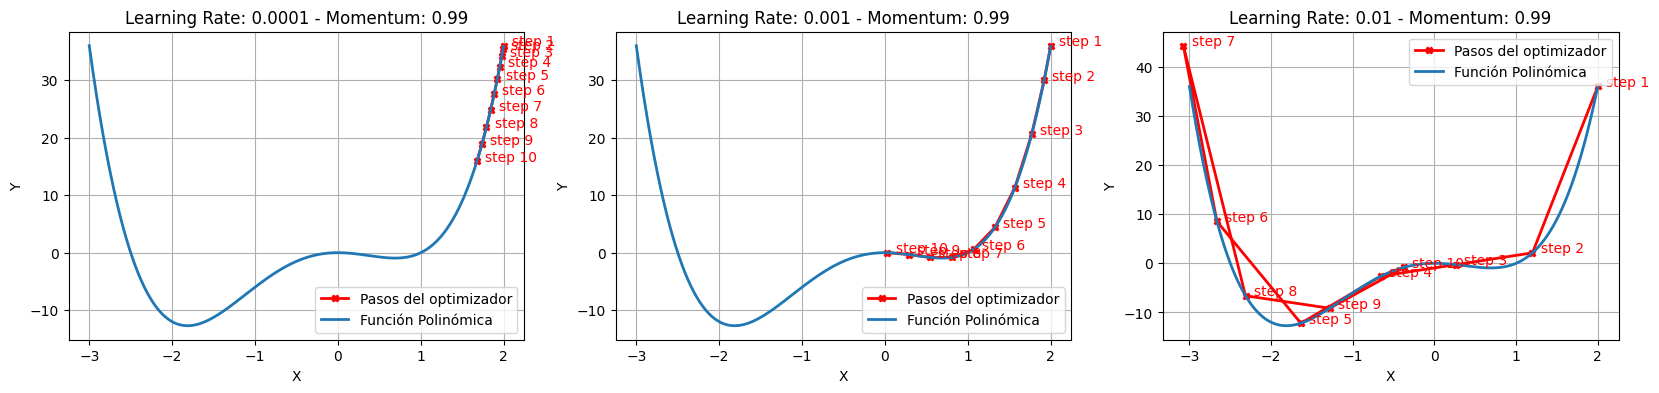

In [ ]:
# Variación Tasa de Aprendizaje - Momentum alto
mom = 0.99
lrs = [0.0001, 0.001, 0.01]
n_cols = len(lrs)
n_rows = 1
fig = plt.figure(figsize=(20, 4))

for i, lr in enumerate(lrs):
  ax = fig.add_subplot(n_rows, n_cols, i + 1)

  x, y, values = optimize(lr, mom)
  plot(x, y, values, ax)